In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
import sys

import matplotlib.pyplot as plt
import numpy as np

from mcopt.pipeline import Pipeline
from mcopt import MorseGraph, ot

sys.path.append('../')
from util import (
  draw_graphs, 
  run_gw,
)

In [11]:
cmap = 'cool'

dist = 'geo'
hist = 'degree'

random_state = np.random.default_rng(42)
num_random_iter = 10

In [12]:
pipeline = Pipeline('../../pipeline.config.json')

tangaroa = pipeline.graph('tangaroa:::15')

> Generating tangaroa graph
  config unchanged, loading graph
  loaded 150 frames


In [13]:
src = tangaroa.frames[0]

dests = tangaroa.frames.copy()
dests.pop(0)

len(dests)

9

# Initial Graphs

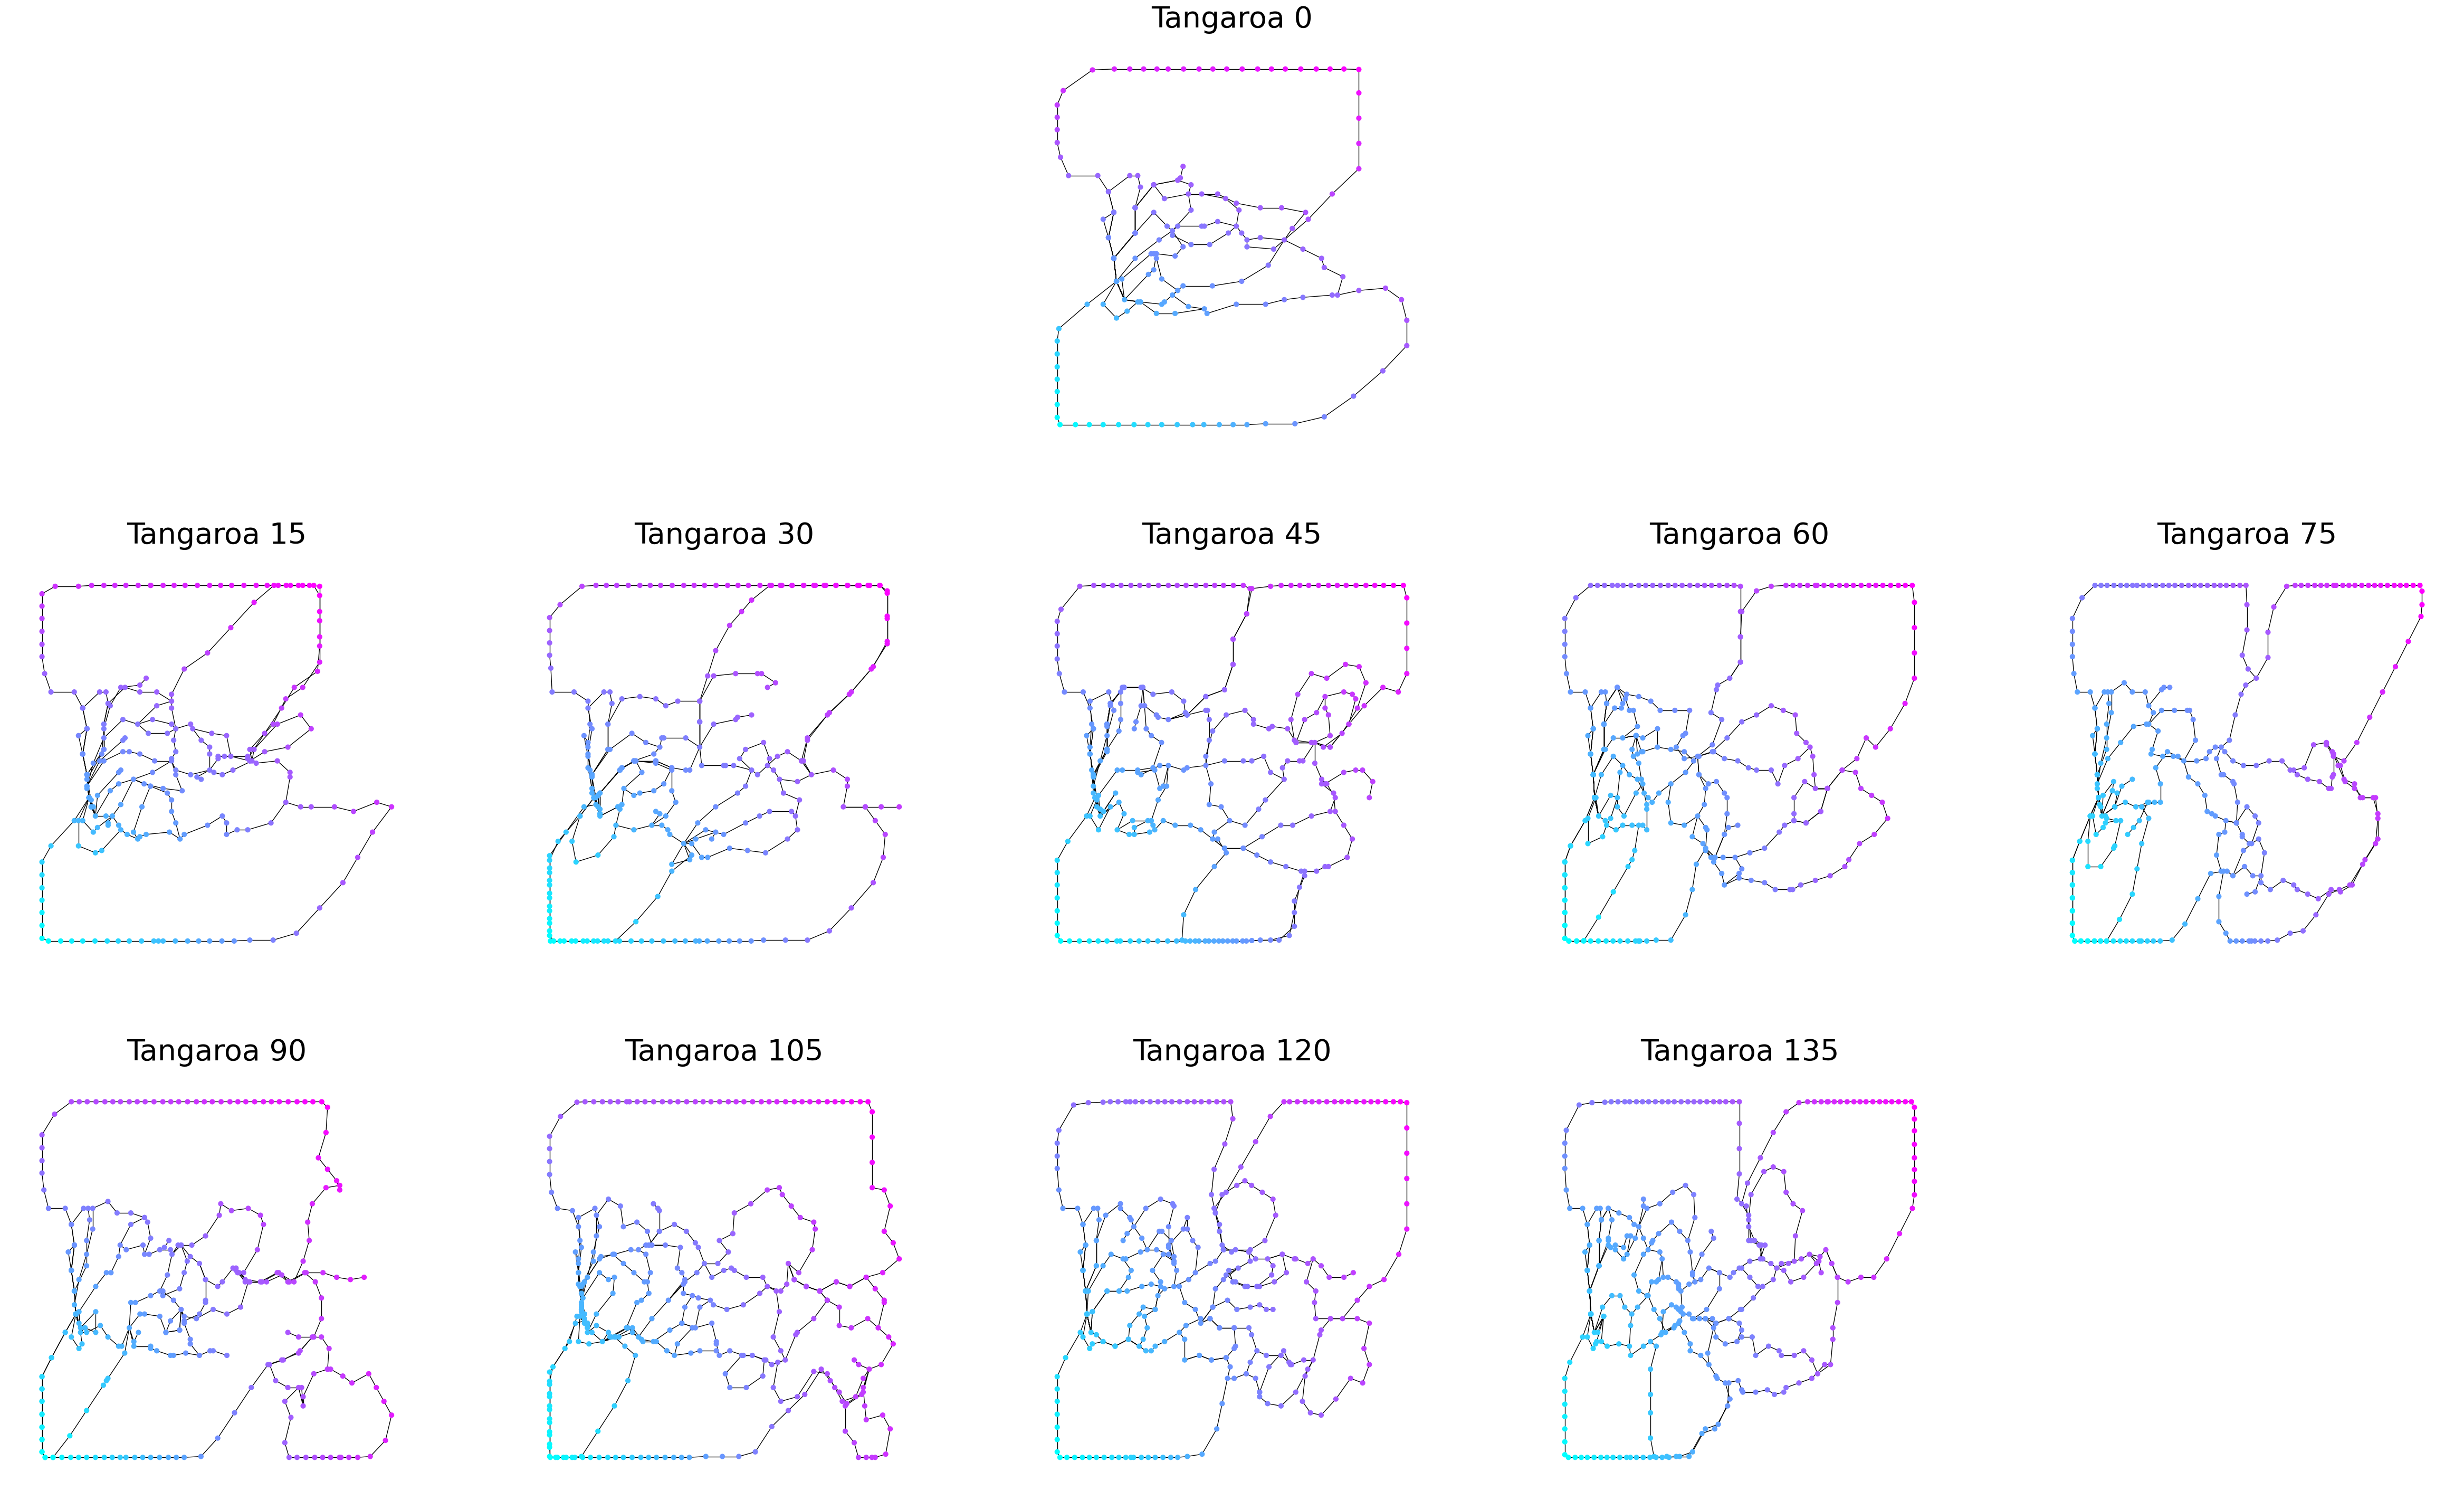

In [14]:
fig = draw_graphs(
  src, dests, 
  width=5, 
  height=3, 
  cmap='cool', 
  src_title='Tangaroa 0', 
  dest_title_fmt='Tangaroa {i}'
)

# GW Transport

In [15]:
gw_couplings = run_gw(
  src, dests, 
  hist=hist, dist=dist, random_G0=True, random_state=random_state, num_random_iter=num_random_iter
)

Running GW for each destination:   0%|          | 0/90 [00:00<?, ?it/s]

Text(0.5, 0.98, 'GW Transport')

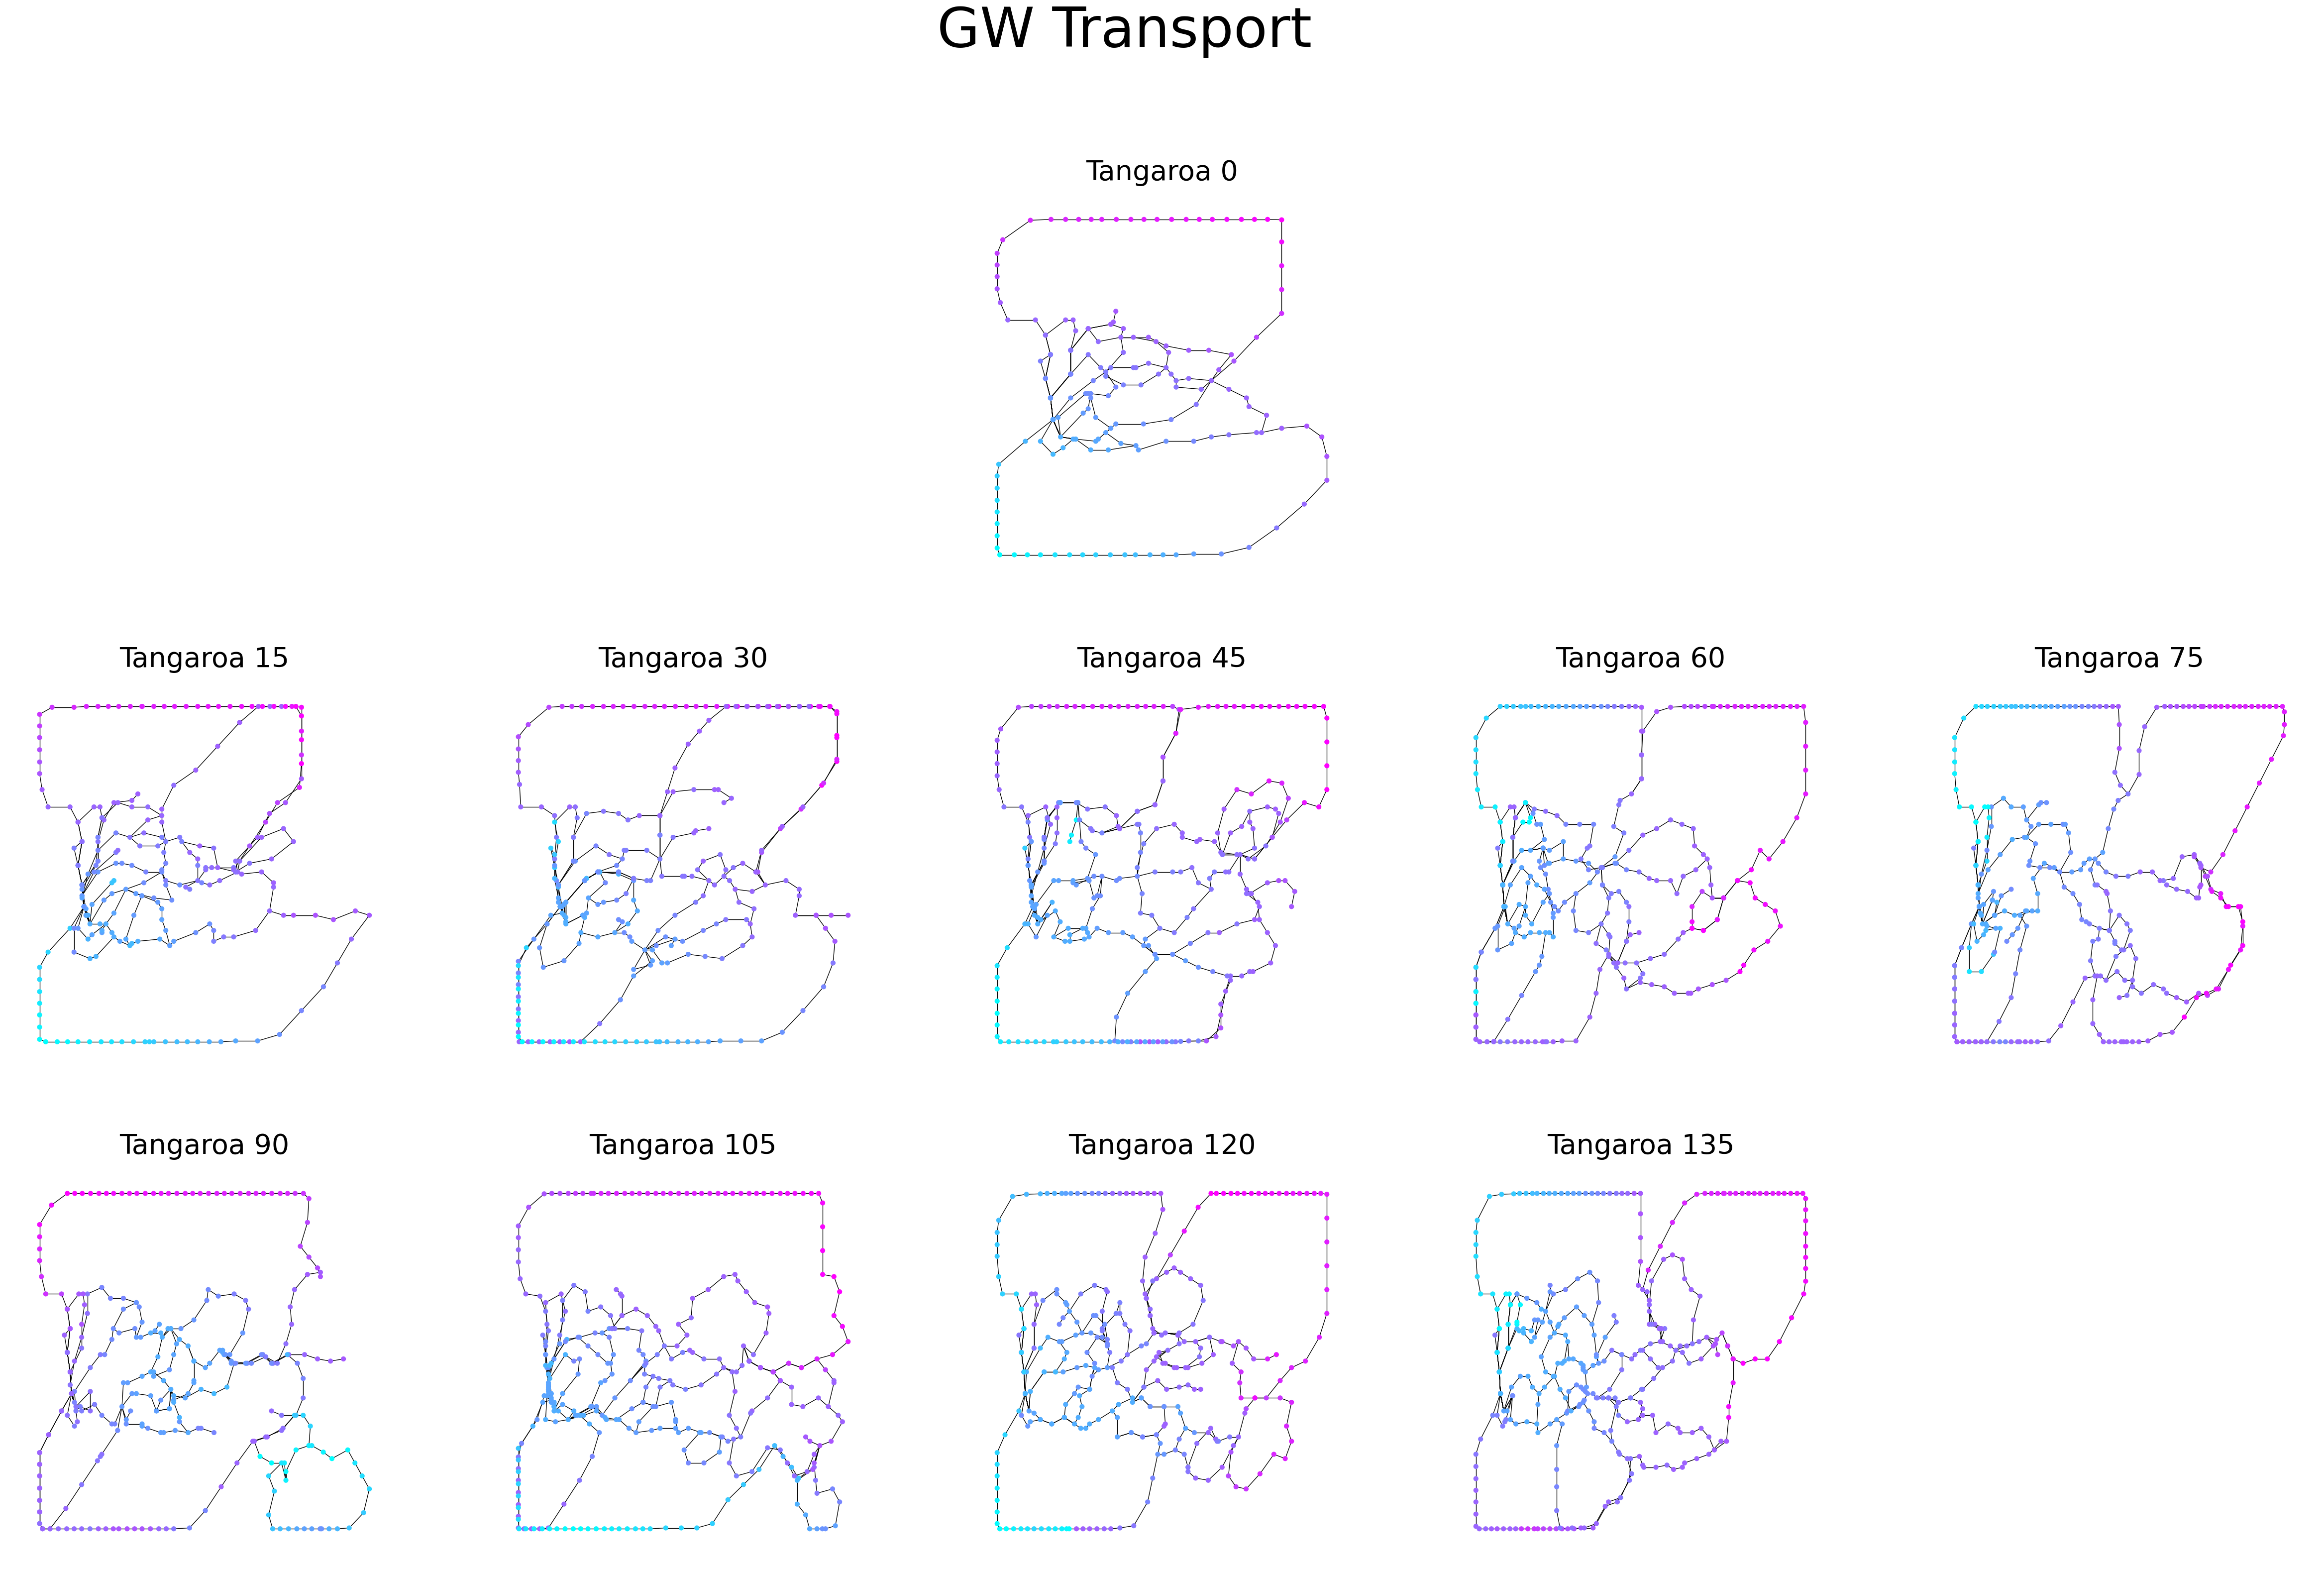

In [16]:
fig = draw_graphs(
  src, dests, 
  width=5, 
  height=3, 
  cmap='cool', 
  src_title='Tangaroa 0', 
  dest_title_fmt='Tangaroa {i}',
  couplings=gw_couplings
)

fig.suptitle('GW Transport', fontsize=80)